## Choosing Optimal degree of polynomial for optimal model to avoid overfitting and underfitting
* Create different order of polynomial
* split polynomial features into training and testing sets
* create model and fit on the training data
* Store/Save RMSE ( Root mean Squared Error for training and testing set )
* Plot the results ( RMSE vs Poly Order )

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Data Science 2024\Study\Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('Sales',axis=1)
y = df['Sales']

### Use PolynomialFeatures

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
train_rmse_errors = []
test_rmse_errors = []

## We create multiple order or degrees from 1 to 10 
## We will see the results of each rmse to choose optimat degree from 1 to 10 before spiking the result curve

for d in range(1,10) :
    # Create an object of Polynomial feature class
    poly_converter = PolynomialFeatures(degree = d, include_bias=False)
    # create poly features using poly_covnerter object
    poly_features = poly_converter.fit_transform(X)

    # train-test-split the newly created polynomial features, not the X features
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # Create model object and fit it with training data
    model = LinearRegression()
    model.fit(X_train,y_train)

    # Create two predictsets against the Training and testing set of Poly_features ie. X-Features with higher degrees
    # We will find the error between the difference of predicted y in training and predicted y in testing phase
    train_pred = model.predict(X_train)    # predicting based on Training dataset
    test_pred = model.predict(X_test)      # predicting based on Testing dataset

    # find out the Root Mean Squared error of training and testing dataset against the known historical lables ie. y_train, y_test
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    # Append the value in 
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [8]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292232,
 0.4339344356902066,
 0.35170836883993495,
 0.2509342951990972,
 0.1971254009841768,
 5.421422348088463,
 0.1426544837726474,
 0.16675345956185658]

* In above results we can see that RMSE is decreasing from 1.7345 to 0.1971 as we increasing polynomial degrees and
* then for the next degree of polynomial RMSE spikes to 5.4214 from 0.1971 that's where overfitting problem occurs.
* i.e where RMSE is 0.1971 the corresponding degree of poly is the optimal degree of polynomial ie. degree = 6
* Let's see for the train-rmse-error by ploting it against the degree of polynomial

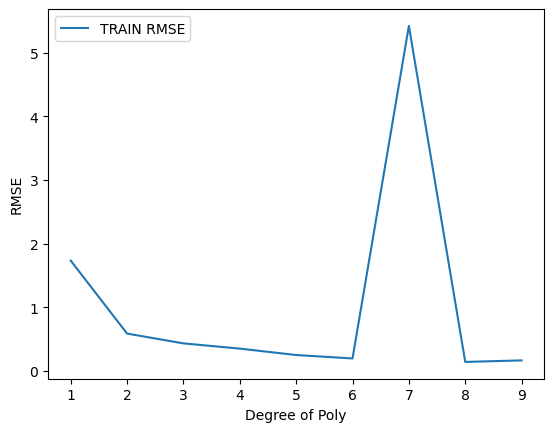

In [10]:
plt.plot(range(1,10),train_rmse_errors[:10],label='TRAIN RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [11]:
test_rmse_errors #Let's see for the test-rmse-error at what degree of polynomial it is giving optimal result

[1.5161519375993877,
 0.6646431757269152,
 0.5803286825156331,
 0.5077742623872589,
 2.5758247707699113,
 4.492670773896812,
 1381.4040685804796,
 4449.568027403435,
 95893.02658330933]

* In above test-rmse-error results we can see that RMSE is decreasing from 1.5161 to 0.5077 i.e at degree = 4
* Then from next degree of polynomial, RMSE is keep increasing from 2.57 to 95893 i.e at degree = 10
* If we consider the test dataset the optimal degree of polynomial is 4, upto which RMSE is low
* Let's plot these error to see the curve of RMSE

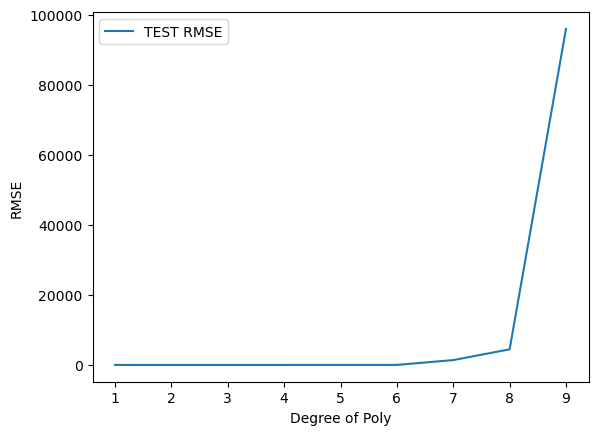

In [13]:
plt.plot(range(1,10),test_rmse_errors[:10],label='TEST RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

* In Above graph we can a straight line upto 6th result, and not able to the descrease in RMSE
* because of highest value on Y-axes from 0 to 10k
* let's plot above graph again considering only 5 degrees of poly, to see the curve clearly

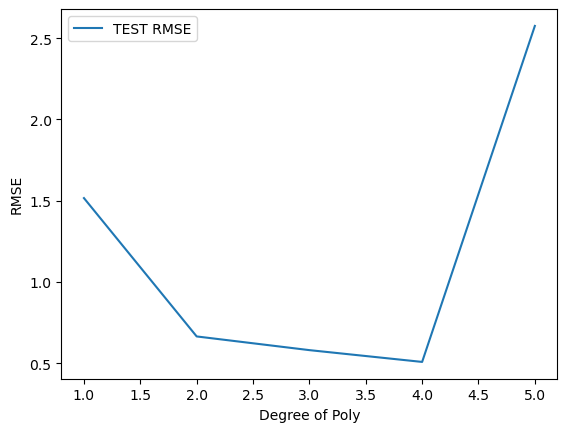

In [15]:
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

* Here in above graph we can clearly see that RMSE is decreasing upto the degree of poly = 4 
* then the RMSE is increasing rapidly, so degree=4 is the optimal complexity for this dataset
* Let's plot these line in single graph to compare against the degree of polynomial

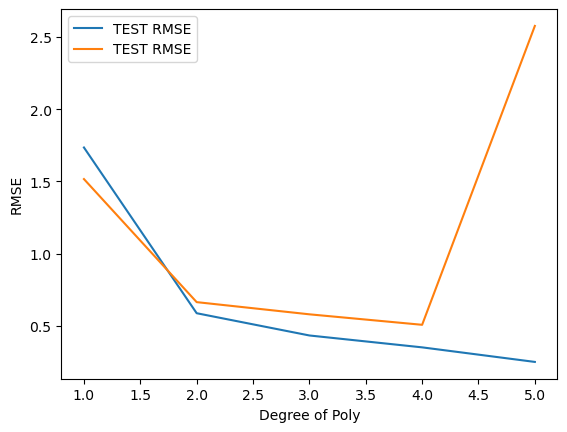

In [17]:
# Let's plot graph upto the 5 degree of poly to see the clear picture
plt.plot(range(1,6),train_rmse_errors[:5],label='TEST RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

### Conclusion
* Even we can see the decrease in RMSE at degree = 4, choosing optimal degree is 4 is not recommended,
* Because we only have considered the historical data,
* For better performance to the unseen data, We should choose degree=2 or 3

_________________________________________________________________________________________
## Model Deployment : Create Final Model
### consider the degree of poly=3

In [20]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)
final_model = LinearRegression()

In [21]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [22]:
from joblib import dump, load

In [23]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [24]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

* Load the model and run it.

In [26]:
loaded_converter = load('final_converter.joblib')

In [27]:
loaded_model = load('final_poly_model.joblib')

In [28]:
campaign = [[149,22,12]] ## Spending on TV, Radio, Newspaper respectively
# convert the 3 features to match our polynomial model of degree=3
transform_data = loaded_converter.fit_transform(campaign)

In [29]:
loaded_model.predict(transform_data)

array([14.64501014])

* Let's compare the predicted value of polynomial model with Simple Linear model
* Poly_model predicted = 14.64
* Simple Linear predicted = 13.89

# End of the Session